V > E


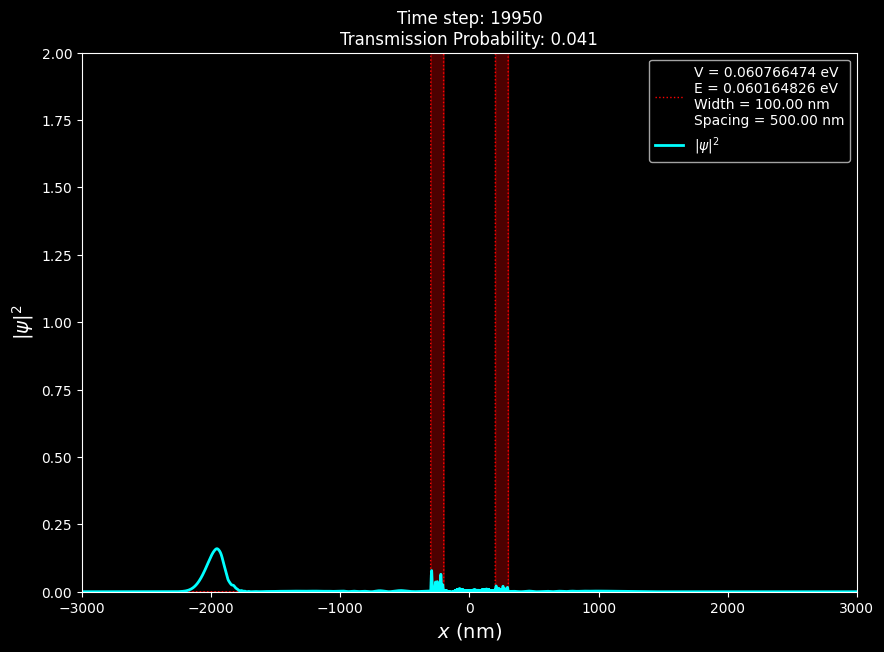

In [7]:
# Quantum tunneling - Double Potential Barriers

# Import libs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import scipy as sp

# Physical constants
h = sp.constants.h
hbar = sp.constants.hbar
m = sp.constants.electron_mass
eV = sp.constants.electron_volt

wavelength = 5e-9
k0 = (2 * np.pi) / wavelength
E_initial = (hbar**2 * k0**2) / (2 * m)

# Discretization of space and time
domain_x = 6e-6
half_domain_x = domain_x/2
nx = 10000
dx = domain_x/nx
x = np.linspace(-half_domain_x, half_domain_x, nx)

dt = 1e-15
Nt = 20000

# Potential barriers
barrier_width = 1e-7
barrier_height = 1.01 * E_initial
space = 5e-7

barrier_center_1 = -space/2
barrier_center_2 = space/2

condition_1 = (np.abs(x - barrier_center_1) < barrier_width / 2)
condition_2 = (np.abs(x - barrier_center_2) < barrier_width / 2)

V = np.zeros_like(x)
V[condition_1 | condition_2] = barrier_height

# Initial Gaussian wave packet
sigma = 20e-9
x0 = -1.5e-6

psi0 = np.exp(-(x-x0)**2/(2*sigma**2)) * np.exp(1j*k0*x)
psi0 = psi0.astype(np.complex128)

# Normalization
psi0 /= np.sqrt(np.sum(np.abs(psi0) ** 2) * dx)

# Wave number
k = np.fft.fftfreq(nx, dx) * 2 * np.pi
k_sq = k**2

# Split the Hamiltonian operator
exp_V = np.exp(-1j * V * dt / (2 * hbar)) # Potential energy operator
exp_K = np.exp(-1j * hbar * k_sq * dt / (2 * m)) # Kinetic energy operator

psi = psi0.copy()
transmission_prob = 0.0

plot_data = []
plot_steps = 50

check_region = x > (barrier_center_2 + barrier_width / 2) # Calculate transmission probability

for t in range(Nt):
    # Step1 Half-Step | Potential energy operator
    psi *= exp_V

    # Step2 Full-Step | Kinetic energy operator + Fourier transform
    psi_k = np.fft.fft(psi)
    psi_k *= exp_K

    # Step3 Half-Step | Potential energy operator + Inverse Fourier transform
    psi = np.fft.ifft(psi_k)

    psi *= exp_V

    if t >= 0:
        Rho = np.abs(psi) ** 2 # Probability density
        transmission_prob = np.sum(Rho[check_region]) * dx # Probability

    if t % plot_steps == 0:
        plot_data.append((t, transmission_prob, Rho))

fig, ax = plt.subplots(figsize=(10, 7))

# Dark theme
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

ax.set_xlabel(r'$x$ (nm)', fontsize=14, color='white')
ax.set_ylabel(r'$|\psi|^2$', fontsize=14, color='white')
ax.set_xlim(x[0] * 1e9, x[-1] * 1e9)
ax.set_ylim(0, 2)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
for spine in ax.spines.values():
    spine.set_color('white')


# Label
E_ev = E_initial / eV
V_ev = barrier_height / eV
width_nm = barrier_width * 1e9
space_nm = space * 1e9

legend_label = (f'V = {V_ev:.9f} eV\n'
                f'E = {E_ev:.9f} eV\n'
                f'Width = {width_nm:.2f} nm\n'
                f'Spacing = {space_nm:.2f} nm')

# Plot potential barriers
V_plot_scale = 2.0 / barrier_height
ax.fill_between(x * 1e9, V * V_plot_scale, color='red', alpha=0.3)
ax.plot(x * 1e9, V * V_plot_scale, color='red', linestyle=':', lw=1, label=legend_label)

t0, prob0, Rho0 = plot_data[0]
max_R0 = np.max(Rho0)
if max_R0 == 0: max_R0 = 1.0

line, = ax.plot(x * 1e9, Rho0 / max_R0, color='cyan', lw=2, label=r'$|\psi|^2$')

title = ax.set_title(f'Time step: {t0}\nTransmission Probability: {prob0:.3f}', color='white')

ax.legend(loc='upper right', facecolor='black', labelcolor='white', fontsize=10, framealpha=0.8)


# Animation
def init():
    t, prob, Rho = plot_data[0]
    line.set_ydata(Rho / max_R0)
    title.set_text(f'Time step: {t}\nTransmission Probability: {prob:.3f}')
    return line, title

def animate(i):
    t, prob, Rho = plot_data[i]
    line.set_ydata(Rho / max_R0)
    title.set_text(f'Time step: {t}\nTransmission Probability: {prob:.3f}')
    return line, title

ani = FuncAnimation(fig, animate, frames=len(plot_data),
                    init_func=init, blit=True, interval=50)
ani.save('qm_double_barrier_dark_1D.mp4', writer='ffmpeg', fps=30)

if (E_initial > barrier_height):
    print('E > V')
elif (E_initial < barrier_height):
    print('V > E')
else:
    print('E = V')

plt.show()

V > E


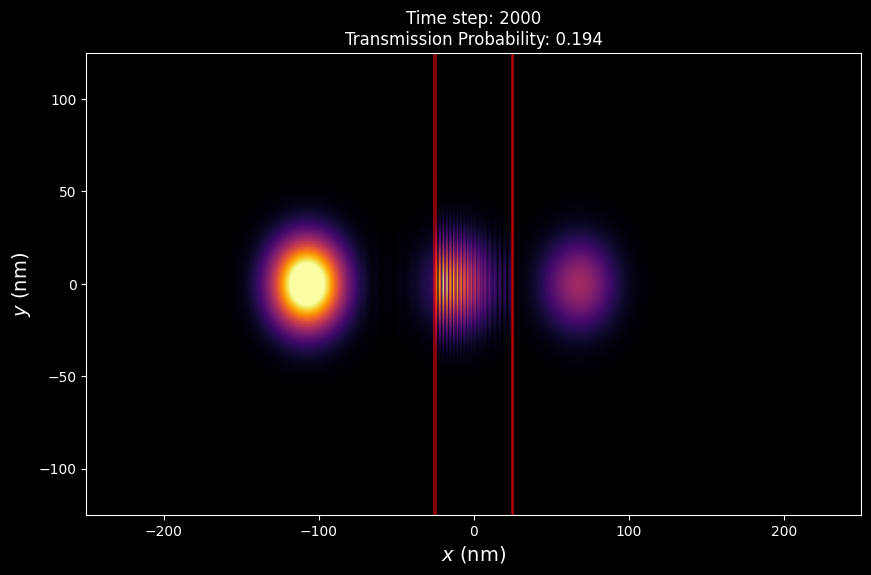

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import scipy as sp

h = sp.constants.h
hbar = sp.constants.hbar
m = sp.constants.electron_mass
eV = sp.constants.electron_volt

wavelength = 5e-9
k0 = (2 * np.pi) / wavelength
E_initial = (hbar**2 * k0**2) / (2 * m)

domain_x = 0.5e-6
domain_y = 0.25e-6
nx = 600
ny = 300
dx = domain_x / nx
dy = domain_y / ny

x = np.linspace(-domain_x/2, domain_x/2, nx)
y = np.linspace(-domain_y/2, domain_y/2, ny)
X, Y = np.meshgrid(x, y)

dt = 5e-16
Nt = 2001
plot_steps = 5

sigma = 5e-9
x0 = -0.85e-7
y0 = 0.0

barrier_width = 1e-9
barrier_height = 1.01 * E_initial
space = 50e-9

barrier_center_1 = -space/2
barrier_center_2 = space/2

condition_1 = (np.abs(X - barrier_center_1) < barrier_width / 2)
condition_2 = (np.abs(X - barrier_center_2) < barrier_width / 2)

psi0 = np.exp(-((X-x0)**2 + (Y-y0)**2)/(2*sigma**2)) * np.exp(1j*k0*X)
psi0 = psi0.astype(np.complex128)
psi0 /= np.sqrt(np.sum(np.abs(psi0) ** 2) * dx * dy)

V = np.zeros_like(X)
V[condition_1 | condition_2] = barrier_height

kx = np.fft.fftfreq(nx, dx) * 2 * np.pi
ky = np.fft.fftfreq(ny, dy) * 2 * np.pi
KX, KY = np.meshgrid(kx, ky)
K_sq = KX**2 + KY**2

exp_V = np.exp(-1j * V * dt / (2 * hbar))
exp_K = np.exp(-1j * hbar * K_sq * dt / (2 * m))

psi = psi0.copy()
plot_data = []

check_region = X > (barrier_center_2 + barrier_width / 2)

for t in range(Nt):
    psi *= exp_V

    psi_k = np.fft.fft2(psi)
    psi_k *= exp_K
    psi = np.fft.ifft2(psi_k)

    psi *= exp_V

    if t % plot_steps == 0:
        Rho = np.abs(psi) ** 2
        transmission_prob = np.sum(Rho[check_region]) * dx * dy
        plot_data.append((t, transmission_prob, Rho))

fig, ax = plt.subplots(figsize=(10, 6))

fig.patch.set_facecolor('black')
ax.set_facecolor('black')

ax.set_xlabel(r'$x$ (nm)', fontsize=14, color='white')
ax.set_ylabel(r'$y$ (nm)', fontsize=14, color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
for spine in ax.spines.values():
    spine.set_color('white')

extent = [x[0]*1e9, x[-1]*1e9, y[0]*1e9, y[-1]*1e9]

t0, prob0, Rho0 = plot_data[0]
im = ax.imshow(Rho0, extent=extent, origin='lower', cmap='inferno', aspect='auto', vmin=0)

ax.axvline(x=(barrier_center_1 - barrier_width/2)*1e9, color='red', linestyle='-', alpha=0.5, linewidth=1.5)
ax.axvline(x=(barrier_center_1 + barrier_width/2)*1e9, color='red', linestyle='-', alpha=0.5, linewidth=1.5)
ax.axvline(x=(barrier_center_2 - barrier_width/2)*1e9, color='red', linestyle='-', alpha=0.5, linewidth=1.5)
ax.axvline(x=(barrier_center_2 + barrier_width/2)*1e9, color='red', linestyle='-', alpha=0.5, linewidth=1.5)

title = ax.set_title(f'Time step: {t0}\nTransmission Probability: {prob0:.3f}', color='white')

# Label
E_ev = E_initial / eV
V_ev = barrier_height / eV
width_nm = barrier_width * 1e9
space_nm = space * 1e9

legend_label = (f'V = {V_ev:.9f} eV\n'
                f'E = {E_ev:.9f} eV\n'
                f'Width = {width_nm:.2f} nm\n'
                f'Spacing = {space_nm:.2f} nm')

def init():
    t, prob, Rho = plot_data[0]
    im.set_data(Rho)
    title.set_text(f'Time step: {t}\nTransmission Probability: {prob:.3f}')
    return im, title

def animate(i):
    t, prob, Rho = plot_data[i]
    im.set_data(Rho)

    max_val = np.max(Rho)
    if max_val > 0:
        im.set_clim(0, max_val * 0.8)

    title.set_text(f'Time step: {t}\nTransmission Probability: {prob:.3f}')
    return im, title

ani = FuncAnimation(fig, animate, frames=len(plot_data),
                    init_func=init, blit=False, interval=50)

ani.save('qm_double_barrier_dark_2D.mp4', writer='ffmpeg', fps=30)

if (E_initial > barrier_height):
    print('E > V')
elif (E_initial < barrier_height):
    print('V > E')
else:
    print('E = V')

plt.show()

V > E


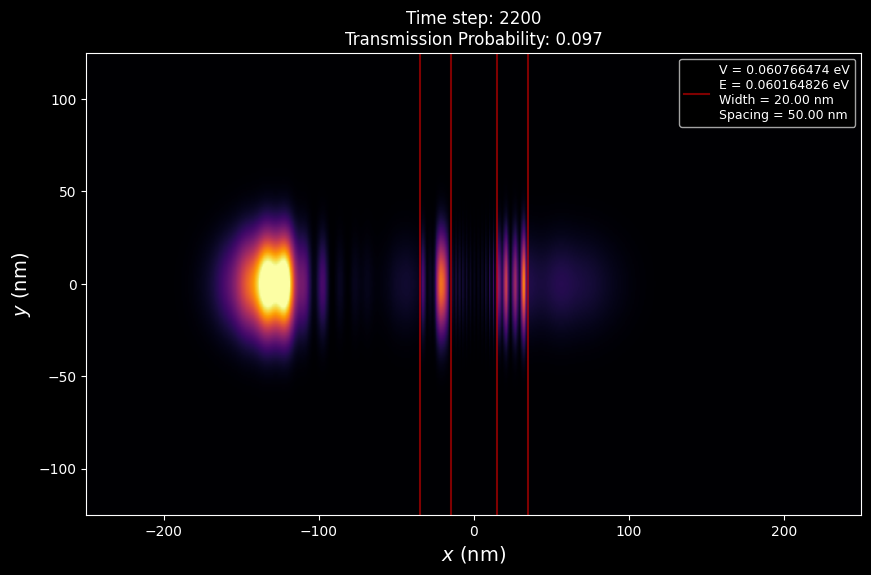

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import scipy as sp

h = sp.constants.h
hbar = sp.constants.hbar
m = sp.constants.electron_mass
eV = sp.constants.electron_volt

wavelength = 5e-9
k0 = (2 * np.pi) / wavelength
E_initial = (hbar**2 * k0**2) / (2 * m)

domain_x = 0.5e-6
domain_y = 0.25e-6
nx = 600
ny = 300
dx = domain_x / nx
dy = domain_y / ny

x = np.linspace(-domain_x/2, domain_x/2, nx)
y = np.linspace(-domain_y/2, domain_y/2, ny)
X, Y = np.meshgrid(x, y)

dt = 5e-16
Nt = 2201
plot_steps = 5

sigma = 5e-9
x0 = -0.85e-7
y0 = 0.0

barrier_width = 20e-9
barrier_height = 1.01 * E_initial
space = 50e-9

barrier_center_1 = -space/2
barrier_center_2 = space/2

condition_1 = (np.abs(X - barrier_center_1) < barrier_width / 2)
condition_2 = (np.abs(X - barrier_center_2) < barrier_width / 2)

psi0 = np.exp(-((X-x0)**2 + (Y-y0)**2)/(2*sigma**2)) * np.exp(1j*k0*X)
psi0 = psi0.astype(np.complex128)
psi0 /= np.sqrt(np.sum(np.abs(psi0) ** 2) * dx * dy)

V = np.zeros_like(X)
V[condition_1 | condition_2] = barrier_height

kx = np.fft.fftfreq(nx, dx) * 2 * np.pi
ky = np.fft.fftfreq(ny, dy) * 2 * np.pi
KX, KY = np.meshgrid(kx, ky)
K_sq = KX**2 + KY**2

exp_V = np.exp(-1j * V * dt / (2 * hbar))
exp_K = np.exp(-1j * hbar * K_sq * dt / (2 * m))

psi = psi0.copy()
plot_data = []

check_region = X > (barrier_center_2 + barrier_width / 2)

for t in range(Nt):
    psi *= exp_V

    psi_k = np.fft.fft2(psi)
    psi_k *= exp_K
    psi = np.fft.ifft2(psi_k)

    psi *= exp_V

    if t % plot_steps == 0:
        Rho = np.abs(psi) ** 2
        transmission_prob = np.sum(Rho[check_region]) * dx * dy
        plot_data.append((t, transmission_prob, Rho))

fig, ax = plt.subplots(figsize=(10, 6))

fig.patch.set_facecolor('black')
ax.set_facecolor('black')

ax.set_xlabel(r'$x$ (nm)', fontsize=14, color='white')
ax.set_ylabel(r'$y$ (nm)', fontsize=14, color='white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
for spine in ax.spines.values():
    spine.set_color('white')

extent = [x[0]*1e9, x[-1]*1e9, y[0]*1e9, y[-1]*1e9]

t0, prob0, Rho0 = plot_data[0]
im = ax.imshow(Rho0, extent=extent, origin='lower', cmap='inferno', aspect='auto', vmin=0)

ax.axvline(x=(barrier_center_1 - barrier_width/2)*1e9, color='red', linestyle='-', alpha=0.5, linewidth=1.5)
ax.axvline(x=(barrier_center_1 + barrier_width/2)*1e9, color='red', linestyle='-', alpha=0.5, linewidth=1.5)
ax.axvline(x=(barrier_center_2 - barrier_width/2)*1e9, color='red', linestyle='-', alpha=0.5, linewidth=1.5)
ax.axvline(x=(barrier_center_2 + barrier_width/2)*1e9, color='red', linestyle='-', alpha=0.5, linewidth=1.5)

title = ax.set_title(f'Time step: {t0}\nTransmission Probability: {prob0:.3f}', color='white')

E_ev = E_initial / eV
V_ev = barrier_height / eV
width_nm = barrier_width * 1e9
space_nm = space * 1e9

legend_label = (f'V = {V_ev:.9f} eV\n'
                f'E = {E_ev:.9f} eV\n'
                f'Width = {width_nm:.2f} nm\n'
                f'Spacing = {space_nm:.2f} nm')

ax.plot([], [], color='red', linestyle='-', alpha=0.5, linewidth=1.5, label=legend_label)
ax.legend(loc='upper right', facecolor='black', labelcolor='white', fontsize=9, framealpha=0.8)

def init():
    t, prob, Rho = plot_data[0]
    im.set_data(Rho)
    title.set_text(f'Time step: {t}\nTransmission Probability: {prob:.3f}')
    return im, title

def animate(i):
    t, prob, Rho = plot_data[i]
    im.set_data(Rho)

    max_val = np.max(Rho)
    if max_val > 0:
        im.set_clim(0, max_val * 0.8)

    title.set_text(f'Time step: {t}\nTransmission Probability: {prob:.3f}')
    return im, title

ani = FuncAnimation(fig, animate, frames=len(plot_data),
                    init_func=init, blit=False, interval=50)

ani.save('qm_double_barrier_dark_2D.mp4', writer='ffmpeg', fps=30)

if (E_initial > barrier_height):
    print('E > V')
elif (E_initial < barrier_height):
    print('V > E')
else:
    print('E = V')

plt.show()